<a href="https://colab.research.google.com/github/vin-thomas/BBC_news_classification/blob/main/BBC_tfidf_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import glob
import numpy as np

##**Data Download**

In [ ]:
URL = "http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip" 
!wget -P 'Data/' $URL

!unzip "/content/Data/bbc-fulltext.zip" -d 'Data/'

--2022-02-10 05:27:02--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘Data/bbc-fulltext.zip.2’

bbc-fulltext.zip.2  100%[===================>]   2.74M  2.11MB/s    in 1.3s    

2022-02-10 05:27:04 (2.11 MB/s) - ‘Data/bbc-fulltext.zip.2’ saved [2874078/2874078]

Archive:  /content/Data/bbc-fulltext.zip
replace Data/bbc/business/001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
iterator= glob.iglob('/content/Data/bbc/**/*.txt', recursive= True)

In [ ]:
def topic (file_path):
  path_list = file_path.split('/')
  return path_list[-2]

In [ ]:
def text (file_path):
  with open (file_path, 'rb') as file:
    var = file.read()
    file.close()
    pass
    return var

In [ ]:
dataset= pd.DataFrame (columns= ['category', 'text'])

for item in iterator:
  a= topic(item)
  b= text (item)
  dataset= dataset.append(pd.DataFrame ([[a, b]], columns= ['category', 'text']))

In [ ]:
dataset.head()

,category,text
0,entertainment,b'Greer attacks \'bully\' Big Brother\n\nGerma...
0,entertainment,"b""Byrds producer Melcher dies at 62\n\nRecord ..."
0,entertainment,b'Brookside actress Keaveney dies\n\nActress A...
0,entertainment,b'Rapper Jay-Z becomes label boss\n\nRap star ...
0,entertainment,b'US actor Ossie Davis found dead\n\nUS actor ...


In [ ]:
#from io import StringIO 
#df = pd.read_csv(StringIO(uploaded['data.csv']))
#df['category_id'] = df['category'].factorize()[0]

In [ ]:
#category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
#category_to_id = dict(category_id_df.values)
#id_to_category = dict(category_id_df[['category_id', 'category']].values)

## **Data exploration**

In [ ]:
dataset.sample(5, random_state=0)

,category,text
0,entertainment,b'Youssou N\'Dour wins music prize\n\nSenegale...
0,business,b'Japanese banking battle at an end\n\nJapan\'...
0,politics,b'Howard attacks \'pay later\' Budget\n\nTory ...
0,tech,b'Gadget show heralds MP3 season\n\nPartners o...
0,politics,b'Blair looks to election campaign\n\nTony Bla...


In [ ]:
group = dataset.groupby('category')

In [ ]:
group.describe()

text  ...     
              count  ... freq
category             ...     
business        510  ...    2
entertainment   386  ...    2
politics        417  ...    2
sport           511  ...    2
tech            401  ...    2

[5 rows x 4 columns]

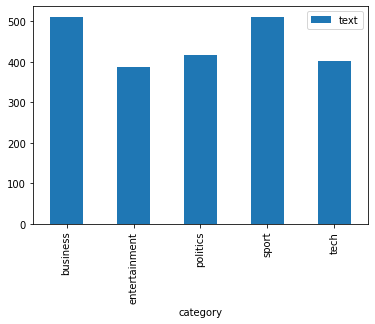

In [ ]:
group.count().plot.bar()

In [ ]:
dataset['category_id']= dataset['category'].factorize()[0]

dataset

,category,text,category_id
0,entertainment,b'Greer attacks \'bully\' Big Brother\n\nGerma...,0
0,entertainment,"b""Byrds producer Melcher dies at 62\n\nRecord ...",0
0,entertainment,b'Brookside actress Keaveney dies\n\nActress A...,0
0,entertainment,b'Rapper Jay-Z becomes label boss\n\nRap star ...,0
0,entertainment,b'US actor Ossie Davis found dead\n\nUS actor ...,0
...,...,...,...
0,business,"b""German growth goes into reverse\n\nGermany's...",4
0,business,b'Air passengers win new EU rights\n\nAir pass...,4
0,business,"b""Troubled Marsh under SEC scrutiny\n\nThe US ...",4
0,business,b'G7 backs Africa debt relief plan\n\nG7 finan...,4


##**Data Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(dataset['text']).toarray()
labels = dataset.category_id


In [ ]:
len (tfidf.vocabulary_)

14415

In [ ]:
print (type(features), features.shape)

<class 'numpy.ndarray'> (2225, 14415)


In [ ]:
category_id_df= dataset[['category', 'category_id']]

In [ ]:
category_id_df.drop_duplicates()

,category,category_id
0,entertainment,0
0,sport,1
0,politics,2
0,tech,3
0,business,4


In [ ]:
category_id_dict = dict(category_id_df[['category', 'category_id']].values)

In [ ]:
category_id_dict

{'business': 4, 'entertainment': 0, 'politics': 2, 'sport': 1, 'tech': 3}

In [ ]:
id_category_dict = dict(category_id_df[['category_id', 'category']].values)

In [ ]:
id_category_dict

{0: 'entertainment', 1: 'sport', 2: 'politics', 3: 'tech', 4: 'business'}

In [ ]:
tfidf.get_feature_names_out()

array(['00', '000', '000 000', ..., 'zone', 'zurich',
       'zurich premiership'], dtype=object)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.feature_selection import chi2

N = 3
for category, category_id in sorted(category_id_dict.items()):
  features_chi2 = chi2(features, labels==category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print ('****')


# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . shares
  . Most correlated bigrams:
       . analysts said
       . economic growth
       . stock market
****
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . los angeles
       . film festival
       . box office
****
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
****
# 'sport':
  . Most correlated unigrams:
       . coach
       . match
       . cup
  . Most correlated bigrams:
       . grand slam
       . australian open
       . champions league
****
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone
****


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
features_new= tsne.fit_transform(features)

In [ ]:
result= pd.DataFrame(features_new)

In [ ]:
result.columns =['A', 'B']
result['C']= dataset['category_id'].values
result['D']= dataset['category'].values


In [ ]:
result

,A,B,C,D
0,34.726944,29.494097,0,entertainment
1,22.414852,41.356720,0,entertainment
2,23.549774,43.733322,0,entertainment
3,13.980349,17.863111,0,entertainment
4,22.354015,46.717186,0,entertainment
...,...,...,...,...
2220,-45.831600,-14.378037,4,business
2221,-34.853798,-5.433980,4,business
2222,-4.051788,3.596599,4,business
2223,-37.813808,-34.330708,4,business


In [ ]:
features_tsne = result[['A', 'B']]
labels_tsne = result['C']

In [ ]:
group = result.groupby ('D')

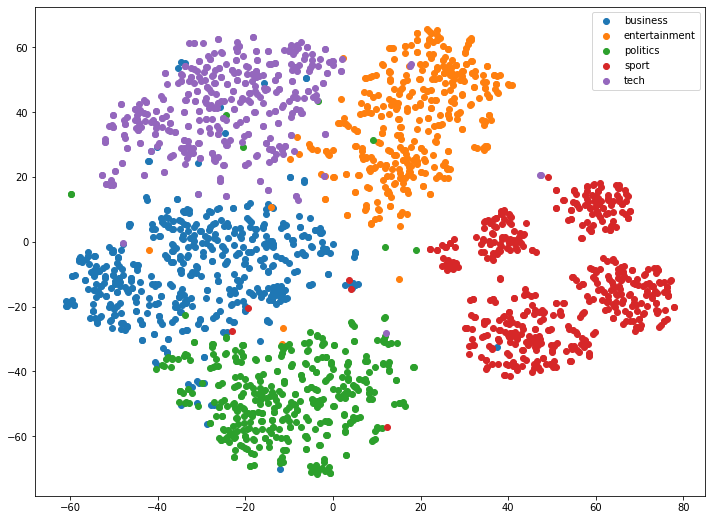

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,9))

for name, group in group:
  plt.scatter(group.A, group.B, label= name)
  plt.legend()

##**Model training and evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataset.index, test_size=0.33, random_state=0)
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(features_tsne, labels_tsne, test_size=0.33, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = [
          ('KNN', KNeighborsClassifier()), ('SVC', SVC()), 
          ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=3 )), ('Gradient Descent',SGDClassifier()), ('Logistic Regression', LogisticRegression(random_state=0))
         ]
for name, model in models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)
  print (name, accuracy)

KNN 0.9591836734693877
SVC 0.9795918367346939
Random Forest 0.8149659863945579
Gradient Descent 0.9809523809523809
Logistic Regression 0.9809523809523809
